# News Mood Analysis
1.	Based on the bar plot of the mean compound sentiment scores for each News organization, CBS News, CNN and NY Times have a negative Vader sentiment analysis with a mean compound score of -0.14, -0.06 and -0.05 respectively.
2.	Fox News had a mean compound score of 0.03 which makes it closest to a neutral sentiment.
3.	Based on the individual Sentiment Analysis plot of each news organization, the individual positive scores of CBS News, CNN and NY Times are mostly between 0-0.5 which keeps it’s mean lower. Whereas, the individual positive scores of BBC are mostly >0.5 which makes the overall score higher. This means that BBC uses a lot of positive sentiments in most of its tweets.
4.	The Vader analysis on news organizations is highly dependent on the type of news that happens on a particular day. A much better analysis would be to analyze a larger sample of tweets over a larger period of time.


In [3]:
# Import Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Accounts
target_user = ("BBC", "CBSNews", "CNN", "FoxNews", "NYTimes")

# create empty list for adding each disctionary of Vader analysis by each tweet
sentiments_all = []

# Loop through all the users
for user in target_user:
    
    # set a counter to count the tweets
    counter = 0      
            
    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count=100)
    #print(public_tweets)
    
    # Loop through the 100 tweets
    for tweet in public_tweets:

        # Utilize JSON dumps to generate a pretty-printed json
        #print(json.dumps(tweet, sort_keys=True, indent=4))
            
        # Run Vader analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        #print(results)
        
        # Assign a variable to the value in results and tweet
        com = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]
        text = tweet["text"]
        created = tweet["created_at"]

        # Append the individual results to the list
        sentiments_all.append({"News Org": user, "Compound": com, "Positive": pos,
                                "Negative": neg, "Neutral": neu, "Text": text, 
                               "Created At": created, "Tweets Ago": counter})
        
        # Increment the counter
        counter += 1

# Create a dataframe from the list
news_sentiment_df = pd.DataFrame(sentiments_all)
news_sentiment_df = news_sentiment_df[["News Org", "Compound", "Positive", "Negative", 
                                       "Neutral", "Text", "Created At", "Tweets Ago"]]
news_sentiment_df.head()

,News Org,Compound,Positive,Negative,Neutral,Text,Created At,Tweets Ago
0,BBC,-0.6808,0.0,0.248,0.752,"No coffee after 2pm, no lie-ins and no phones ...",Wed Mar 14 21:14:04 +0000 2018,0
1,BBC,0.0000,0.0,0.000,1.000,🛩️ The sky's the limit! https://t.co/eQgP9MDBCj,Wed Mar 14 20:00:03 +0000 2018,1
2,BBC,0.0000,0.0,0.000,1.000,“Remember to look up at the stars and not down...,Wed Mar 14 19:10:00 +0000 2018,2
3,BBC,-0.7964,0.0,0.351,0.649,Britain's most iconic dog is in crisis. Cather...,Wed Mar 14 19:04:03 +0000 2018,3
4,BBC,0.0000,0.0,0.000,1.000,🔊😵 This is trippy. \n\n#TonesDronesAndArpeggio...,Wed Mar 14 18:30:00 +0000 2018,4


In [5]:
# Save a CSV of all data retrieved 
news_sentiment_df.to_csv("NewsOrgSentiments.csv", index=False)

In [6]:
# Separate data by Nes Organzations

bbc_df = news_sentiment_df.loc[news_sentiment_df["News Org"] == "BBC",:]
cbsnews_df = news_sentiment_df.loc[news_sentiment_df["News Org"] == "CBSNews",:]
cnn_df = news_sentiment_df.loc[news_sentiment_df["News Org"] == "CNN",:]
foxnews_df = news_sentiment_df.loc[news_sentiment_df["News Org"] == "FoxNews",:]
nytimes_df = news_sentiment_df.loc[news_sentiment_df["News Org"] == "NYTimes",:]

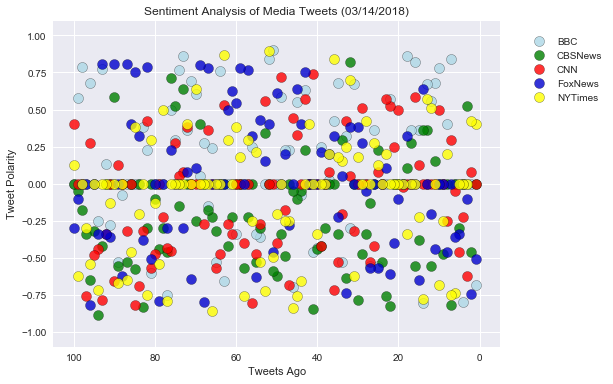

In [7]:
# Plot a scatter plot of sentiments of the last __100__ tweets sent out by each news organization

# Use Seaborn library to set the size and look of the plot
sns.set_style("darkgrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2} 
sns.set(rc={'figure.figsize':(8,6)})

# x and y axis data
tweets_ago_x = np.arange(1, counter+1)

tweet_polarity_bbc_y = bbc_df["Compound"]
tweet_polarity_cbsnews_y = cbsnews_df["Compound"]
tweet_polarity_cnn_y = cnn_df["Compound"]
tweet_polarity_foxnews_y = foxnews_df["Compound"]
tweet_polarity_nytimes_y = nytimes_df["Compound"]

# plot the graph
plt.scatter(tweets_ago_x, tweet_polarity_bbc_y, s=100, marker="o", facecolors="lightblue",
            edgecolors="black", alpha=0.8, label="BBC")
plt.scatter(tweets_ago_x, tweet_polarity_cbsnews_y, s=100, marker="o", facecolors="green",
            edgecolors="black", alpha=0.8, label="CBSNews")
plt.scatter(tweets_ago_x, tweet_polarity_cnn_y, s=100, marker="o", facecolors="red",
            edgecolors="black", alpha=0.8, label="CNN")
plt.scatter(tweets_ago_x, tweet_polarity_foxnews_y, s=100, marker="o", facecolors="mediumblue",
            edgecolors="black", alpha=0.8, label="FoxNews")
plt.scatter(tweets_ago_x, tweet_polarity_nytimes_y, s=100, marker="o", facecolors="yellow",
            edgecolors="black", alpha=0.8, label="NYTimes")

# get current date for the plot title
today_date = time.strftime("%m/%d/%Y")

# set the x and y axis limits and labels and chart title     
plt.xlim(105, -5)
plt.ylim(-1.1, 1.1)
plt.title(f"Sentiment Analysis of Media Tweets ({today_date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1.25, 0.85), loc='right')

# Save our graph and show the graph
plt.savefig('All_NewsOrg_Sentiments.png')
plt.show()

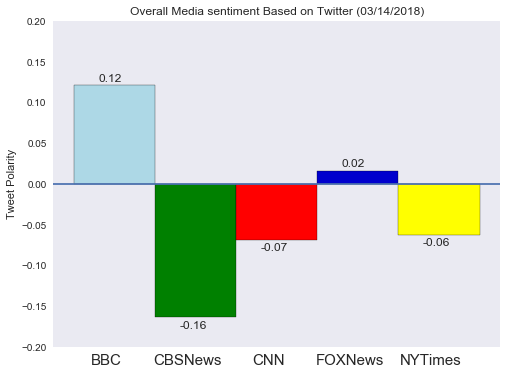

In [8]:
# Plot a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization
sns.set(rc={'figure.figsize':(8,6)})

# x-axis for the plot (for tick locations)
news_org_x = np.arange(0, 5)

# y-axis for the plot
bar_polarity_bbc_y = bbc_df["Compound"].mean()
bar_polarity_cbsnews_y = cbsnews_df["Compound"].mean()
bar_polarity_cnn_y = cnn_df["Compound"].mean()
bar_polarity_foxnews_y = foxnews_df["Compound"].mean()
bar_polarity_nytimes_y = nytimes_df["Compound"].mean()

data_y = [bar_polarity_bbc_y, bar_polarity_cbsnews_y, bar_polarity_cnn_y, bar_polarity_foxnews_y, bar_polarity_nytimes_y]

# Set the Colors
clrs = ["lightblue", "green", "red", "mediumblue", "yellow"]

# plot the barplot
bar_plot_all = plt.bar(news_org_x, data_y, color= clrs, edgecolor='black', alpha=1, align="edge", width=1)


# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in news_org_x]
plt.xticks(tick_locations, ["BBC", "CBSNews", "CNN", "FOXNews", "NYTimes"], fontsize=15)

# set the x and y axis limits and labels, chart title and legends 
plt.ylim(-0.2, .20)
plt.title(f"Overall Media sentiment Based on Twitter ({today_date})")
plt.ylabel("Tweet Polarity")
plt.axhline(0)
plt.grid()

# Add values above the two bar graphs
count = 0
for sent in data_y:
    if sent < 0:
        y_loc = -0.013
    else:
        y_loc = 0.005
    plt.text(count+0.3, sent+y_loc, str(round(sent,2)))
    count = count + 1

# Save our graph and show the graph
plt.savefig('OverallMediaSentiments.png')
plt.show()


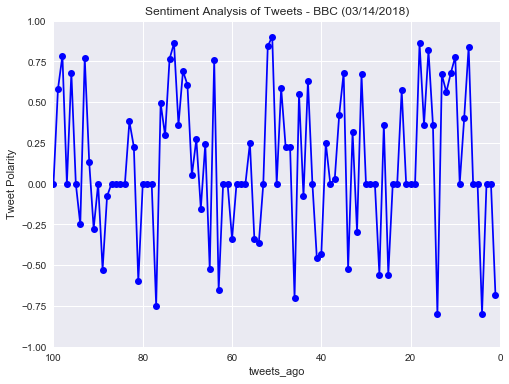

In [9]:
# Plot a line plot of sentiments of the last __100__ tweets sent out by each news organization
sns.set(rc={'figure.figsize':(8,6)})

# BBC
plt.plot(tweets_ago_x, bbc_df["Compound"], marker ='o', color='blue', label="@bbc")

# Set the x-y limits, labels and title
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel('tweets_ago')
plt.ylabel('Tweet Polarity')
plt.title(f"Sentiment Analysis of Tweets - BBC ({today_date})")

# Save our graph and show the graph
plt.savefig('SentimentAnalysis_BBC.png')
plt.show()

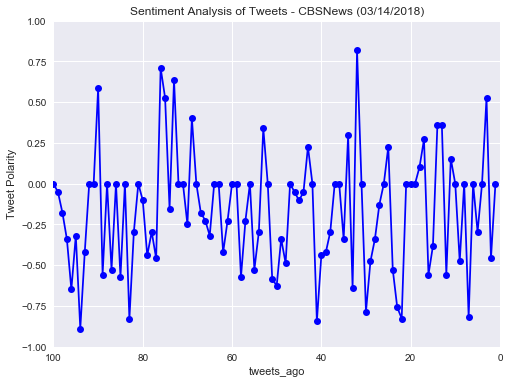

In [10]:
# Plot a line plot of sentiments of the last __100__ tweets sent out by each news organization
sns.set(rc={'figure.figsize':(8,6)})

# CBSNews
plt.plot(tweets_ago_x, cbsnews_df["Compound"], marker ='o', color='blue', label="@bbc")

# Set the x-y limits, labels and title
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel('tweets_ago')
plt.ylabel('Tweet Polarity')
plt.title(f"Sentiment Analysis of Tweets - CBSNews ({today_date})")

# Save our graph and show the graph
plt.savefig('SentimentAnalysis_CBSNews.png')
plt.show()

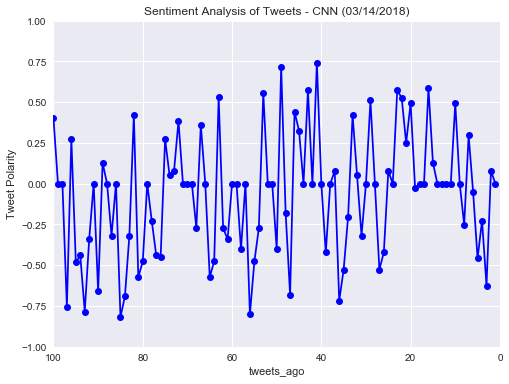

In [11]:
# Plot a line plot of sentiments of the last __100__ tweets sent out by each news organization
sns.set(rc={'figure.figsize':(8,6)})

# CNN
plt.plot(tweets_ago_x, cnn_df["Compound"], marker ='o', color='blue', label="@bbc")

# Set the x-y limits, labels and title
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel('tweets_ago')
plt.ylabel('Tweet Polarity')
plt.title(f"Sentiment Analysis of Tweets - CNN ({today_date})")

# Save our graph and show the graph
plt.savefig('SentimentAnalysis_CNN.png')
plt.show()

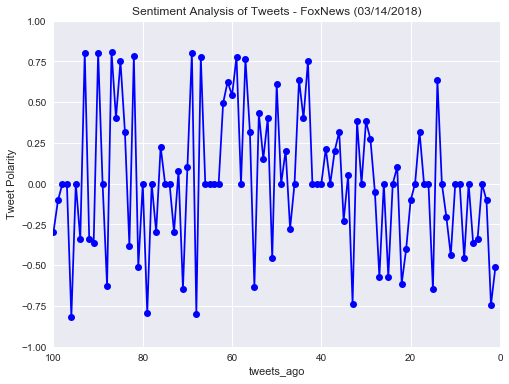

In [12]:
# Plot a line plot of sentiments of the last __100__ tweets sent out by each news organization
sns.set(rc={'figure.figsize':(8,6)})

# FoxNews
plt.plot(tweets_ago_x, foxnews_df["Compound"], marker ='o', color='blue', label="@bbc")

# Set the x-y limits, labels and title
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel('tweets_ago')
plt.ylabel('Tweet Polarity')
plt.title(f"Sentiment Analysis of Tweets - FoxNews ({today_date})")

# Save our graph and show the graph
plt.savefig('SentimentAnalysis_FoxNews.png')
plt.show()

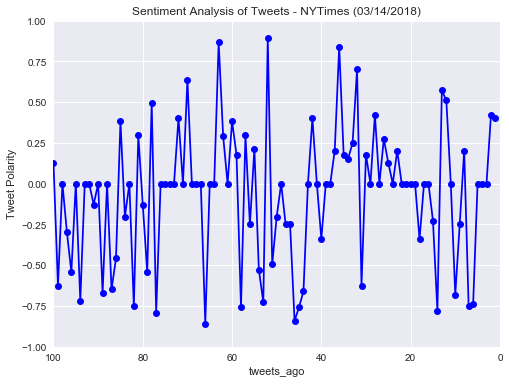

In [13]:
# Plot a line plot of sentiments of the last __100__ tweets sent out by each news organization
sns.set(rc={'figure.figsize':(8,6)})

# NYTimes
plt.plot(tweets_ago_x, nytimes_df["Compound"], marker ='o', color='blue', label="@bbc")

# Set the x-y limits, labels and title
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel('tweets_ago')
plt.ylabel('Tweet Polarity')
plt.title(f"Sentiment Analysis of Tweets - NYTimes ({today_date})")

# Save our graph and show the graph
plt.savefig('SentimentAnalysis_nytimes.png')
plt.show()